#Setting Up Environment

In [ ]:
# File System uploaded directly into Collab
# Will it remain on a refresh or close and open? So far yes however you did upload the files into the directory as well
import pandas as pd
file = ('/content/walmart.csv')

df = pd.read_csv(file)


# We have columns and indexes (0,1,2,3..)

In [ ]:
df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',


                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

# Demo Improvement From Median To Mean Classification

In [ ]:
## Using Median MinMax Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].median()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.641
Precision: 0.641
Recall: 0.641
F1 Score: 0.641
Confusion Matrix:
 [[34557 20589]
 [18929 35939]]
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.63      0.64     55146
        True       0.64      0.66      0.65     54868

    accuracy                           0.64    110014
   macro avg       0.64      0.64      0.64    110014
weighted avg       0.64      0.64      0.64    110014



In [ ]:
## Using Mean MinMaxScaler

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.788
Precision: 0.789
Recall: 0.788
F1 Score: 0.781
Confusion Matrix:
 [[59647  6775]
 [16599 26993]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84     66422
        True       0.80      0.62      0.70     43592

    accuracy                           0.79    110014
   macro avg       0.79      0.76      0.77    110014
weighted avg       0.79      0.79      0.78    110014



# Linear Regression Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# Label Encoding
for column in changedX.select_dtypes(include=['object']).columns:
    changedX[column] = pd.Categorical(changedX[column]).codes

# MinMaxScaler
scaler = MinMaxScaler()
changedX_scaled = scaler.fit_transform(changedX)
changedX_train, changedX_test, y_train, y_test = train_test_split(changedX_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)



print("Linear Regression Label Encoding Metrics For Sales Target:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)

Linear Regression Label Encoding Metrics For Sales Target:
MSE: 22023142.515233032
R^2 Score: 0.12349817745837499


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# One-hot encode
changedX = pd.get_dummies(changedX, drop_first=True)  # drop_first to avoid dummy variable trap

#MinMaxScaler
scaler = MinMaxScaler()
changedX_scaled = scaler.fit_transform(changedX)
changedX_train, changedX_test, y_train, y_test = train_test_split(changedX_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print("Linear Regression Metrics:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)


Linear Regression Metrics:
MSE: 22010737.371376548
R^2 Score: 0.12399189134101352


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# One-hot encode
changedX = pd.get_dummies(changedX, drop_first=True)  # drop_first to avoid dummy variable trap

#RobustScaler
scaler = RobustScaler()
changedX_scaled = scaler.fit_transform(changedX)
changedX_train, changedX_test, y_train, y_test = train_test_split(changedX_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print("Linear Regression Metrics:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)

Linear Regression Metrics:
MSE: 22010737.371376716
R^2 Score: 0.12399189134100674


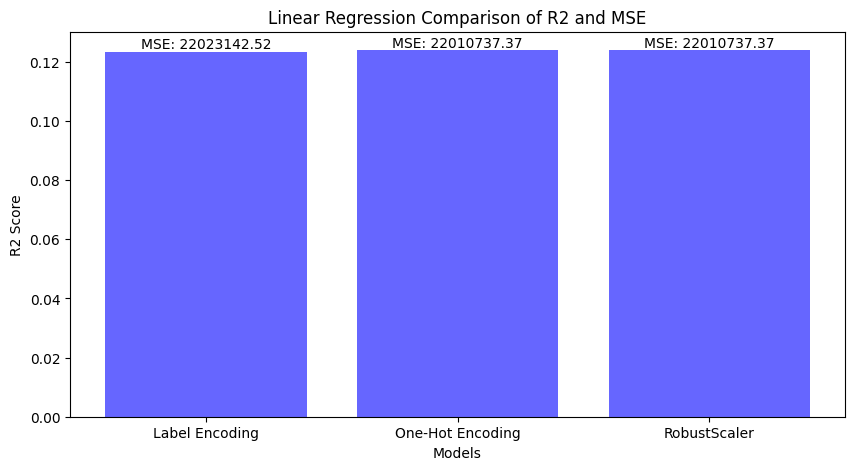

In [ ]:
import matplotlib.pyplot as plt

models = ["Label Encoding", "One-Hot Encoding", "RobustScaler"]
mse = [22023142.5152332, 22010737.371376548, 22010737.37137616]
r2 = [0.12348917745873499, 0.12399189134101352, 0.12399189134010674]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(models, r2, color='b', alpha=0.6)

for bar, mse_value in zip(bars, mse):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'MSE: { mse_value:.2f}',
            verticalalignment='bottom', ha='center')


ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('Linear Regression Comparison of R2 and MSE')
plt.show()


# Logistic Regression Models

In [ ]:
# WORKING HERE

In [ ]:
# Testing Using Median

import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].median()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.640
Precision: 0.640
Recall: 0.640
F1 Score: 0.640
Confusion Matrix:
 [[34501 20645]
 [18940 35928]]
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.63      0.64     55146
        True       0.64      0.65      0.64     54868

    accuracy                           0.64    110014
   macro avg       0.64      0.64      0.64    110014
weighted avg       0.64      0.64      0.64    110014



In [ ]:
#Testing increasing iterations using Median

import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].median()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='weighted')



#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.640
Precision: 0.640
Recall: 0.655
F1 Score: 0.640
Confusion Matrix:
 [[34487 20659]
 [18924 35944]]
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.63      0.64     55146
        True       0.64      0.66      0.64     54868

    accuracy                           0.64    110014
   macro avg       0.64      0.64      0.64    110014
weighted avg       0.64      0.64      0.64    110014



In [ ]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Testing Mean
XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.788
Precision: 0.789
Recall: 0.788
F1 Score: 0.781
Confusion Matrix:
 [[59654  6768]
 [16598 26994]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84     66422
        True       0.80      0.62      0.70     43592

    accuracy                           0.79    110014
   macro avg       0.79      0.76      0.77    110014
weighted avg       0.79      0.79      0.78    110014



In [ ]:
## Using Median Standard Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].median()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.640
Precision: 0.640
Recall: 0.640
F1 Score: 0.640
Confusion Matrix:
 [[34474 20672]
 [18925 35943]]
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.63      0.64     55146
        True       0.63      0.66      0.64     54868

    accuracy                           0.64    110014
   macro avg       0.64      0.64      0.64    110014
weighted avg       0.64      0.64      0.64    110014



In [ ]:
## Using Median MinMax Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].median()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.641
Precision: 0.641
Recall: 0.641
F1 Score: 0.641
Confusion Matrix:
 [[34557 20589]
 [18929 35939]]
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.63      0.64     55146
        True       0.64      0.66      0.65     54868

    accuracy                           0.64    110014
   macro avg       0.64      0.64      0.64    110014
weighted avg       0.64      0.64      0.64    110014



In [ ]:
## Using Mean MinMaxScaler

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.788
Precision: 0.789
Recall: 0.788
F1 Score: 0.781
Confusion Matrix:
 [[59647  6775]
 [16599 26993]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84     66422
        True       0.80      0.62      0.70     43592

    accuracy                           0.79    110014
   macro avg       0.79      0.76      0.77    110014
weighted avg       0.79      0.79      0.78    110014



In [ ]:
## Using Mean Standard Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.788
Precision: 0.789
Recall: 0.788
F1 Score: 0.781
Confusion Matrix:
 [[59653  6769]
 [16598 26994]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84     66422
        True       0.80      0.62      0.70     43592

    accuracy                           0.79    110014
   macro avg       0.79      0.76      0.77    110014
weighted avg       0.79      0.79      0.78    110014



In [ ]:
## Using Mean RobustScaler Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



X_train, X_test, y_train, y_test = train_test_split(XLogisticRegression, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)


scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.788
Precision: 0.789
Recall: 0.788
F1 Score: 0.781
Confusion Matrix:
 [[59646  6776]
 [16594 26998]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84     66422
        True       0.80      0.62      0.70     43592

    accuracy                           0.79    110014
   macro avg       0.79      0.76      0.77    110014
weighted avg       0.79      0.79      0.78    110014



# Trees

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

XDecisionTreeRegressor = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']
# One-hot
XDecisionTreeRegressor = pd.get_dummies(XDecisionTreeRegressor, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(XDecisionTreeRegressor, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 8950520.859929599
R-squared (R²): 0.6437770930738531


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

XDecisionTreeRegressor = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']
# One-hot
XDecisionTreeRegressor = pd.get_dummies(XDecisionTreeRegressor, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(XDecisionTreeRegressor, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 8950520.859929599
R-squared (R²): 0.6437770930738531


In [ ]:
#Non linear relationships in data and wide range of receipt values i.e. 12- 25k

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

XDecisionTreeRegressor = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']
# One-hot
XDecisionTreeRegressor = pd.get_dummies(XDecisionTreeRegressor, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(XDecisionTreeRegressor, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 8950520.859929599
R-squared (R²): 0.6437770930738531


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import RobustScaler

XDecisionTreeRegressor = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']
# One hot
XDecisionTreeRegressor = pd.get_dummies(XDecisionTreeRegressor, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(XDecisionTreeRegressor, y, test_size=0.2, random_state=42)



scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("Decision Tree Regressor Results:")

print("mean_absolute_error:", MAE)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Decision Tree Regressor Results:
mean_absolute_error: 2185.090939720006
Mean Squared Error (MSE): 8950520.859929599
R-squared (R²): 0.6437770930738531


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

X = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred = random_forest_model.predict(X_test_scaled)



print("Random Forest Regressor Results:")


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)


print("mean_absolute_error:", MAE)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Random Forest Regressor Results:
mean_absolute_error: 2171.981572069039
Mean Squared Error (MSE): 8745856.107834546
R-squared (R²): 0.6519225713178076


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


X = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)
y_pred = gradient_boosting_model.predict(X_test_scaled)




mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)


print("Gradient Boosting Regressor Results:")
print("mean_absolute_error:", MAE)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Gradient Boosting Regressor Results:
mean_absolute_error: 2289.340348444576
Mean Squared Error (MSE): 9166417.23620022
R-squared (R²): 0.6351846060048327
